In [8]:
import numpy as np
import gstlearn as gl
from scipy.special import gamma

scale = 6.
param = 2.

kappa = 1./scale
kappa2 = kappa**2

$g(\xi) = \frac{1}{(2\pi)^{d/2}(\kappa^2 + |\xi|^2)^{\alpha/2}}$

In [9]:
model = gl.Model.createFromParam(gl.ECov.BESSEL_K,range = scale,param = param,flagRange=False)

In [10]:
model


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
K-Bessel (Third Parameter = 2)
- Sill         =      1.000
- Range        =     29.394
- Theo. Range  =      6.000
Total Sill     =      1.000

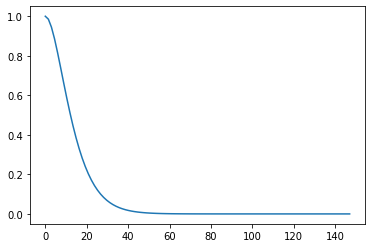

In [19]:
import matplotlib.pyplot as plt
import gstlearn as gl

rangev = 5 * model.getCova(0).getRange()
h = np.linspace(0,rangev,100)
points = [gl.SpacePoint([0.,i]) for i in h]
cov = [model.eval(0,0,points[0],i) for i in points]
plt.plot(h,cov)
plt.show()

In [20]:
def correc(kappa,alpha,d=2):
    return gamma(alpha-d/2)/ (gamma(alpha)*(4*np.pi)**(d/2)*kappa**(2*alpha-d))
    
correc(1,2)

0.07957747154594767

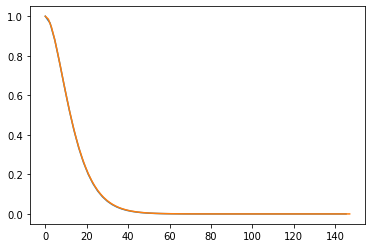

In [21]:
d = 2
alpha = param+d/2

N = 2**8
a= np.pi * (N-1) / np.max(h) 
ind = np.arange(0,int(N/2),2)
v = np.linspace(-1.,1.,N)
u = a/2 * v
deltau=a/(N-1)

normxi = np.array([i**2 + j**2 for i in u for j in u]).reshape((len(u),len(u)))

fourier = 1./((2*np.pi)**d*(kappa2+normxi)**alpha)*1./correc(kappa,param+d/2,d)

B = np.real(np.fft.fftn(fourier,norm="backward"))
A = B[0,:][ind]


covZ=A*deltau**d
X= np.pi * (v[ind]-v[0]) /deltau


plt.plot(X , covZ)
plt.plot(h,cov)

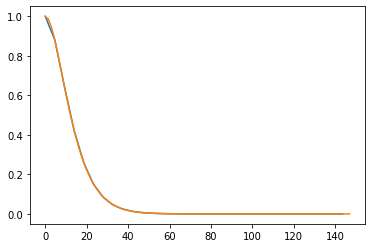

In [22]:
d = 3
alpha = param + d/2
N = 2**7
a= np.pi * (N-1) / np.max(h) 
ind = np.arange(0,int(N/2),2)
v = np.linspace(-1.,1.,N)
u = a/2 * v
deltau=a/(N-1)

normxi = np.array([i**2 + j**2 + k**2 for i in u for j in u for k in u]).reshape((len(u),len(u),len(u)))

fourier = 1./((2*np.pi)**d*(kappa2+normxi)**alpha)*1./correc(kappa,alpha,d)

B = np.real(np.fft.fftn(fourier,norm="backward"))
A = B[0,0,:][ind]


z=A*deltau**d
X= np.pi * (v[ind]-v[0]) /deltau


plt.plot(X , z)
plt.plot(h,cov)

array([  0.        ,   4.62895699,   9.25791399,  13.88687098,
        18.51582798,  23.14478497,  27.77374197,  32.40269896,
        37.03165595,  41.66061295,  46.28956994,  50.91852694,
        55.54748393,  60.17644093,  64.80539792,  69.43435491,
        74.06331191,  78.6922689 ,  83.3212259 ,  87.95018289,
        92.57913988,  97.20809688, 101.83705387, 106.46601087,
       111.09496786, 115.72392486, 120.35288185, 124.98183884,
       129.61079584, 134.23975283, 138.86870983, 143.49766682])